<font size = "5"> Project - Numerical Optimization and Large Scale Linear Algebra
    
**<font size = "5">House price prediction**
    
<font size = "4">Melina Moniaki - f3352321

In [1]:
import pandas as pd
import openpyxl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Excel file into a DataFrame
df = pd.read_excel("C:\\Users\\melin\\Desktop\\Data Science\\Numerical Optimization\\Assignment 1\\Archive\\housedata.xls", sheet_name=1)

df.head()

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise",selling price in 1000 dollars
0,2,2,2,941,1,94905
1,2,3,2,1146,0,98937
2,2,3,2,909,0,100309
3,3,3,2,1289,0,106250
4,3,3,1,1020,0,107502


In [3]:
df = df.rename(columns={'location ': 'location', '#bedrooms': 'bedrooms', '#bathrooms': 'bathrooms', 'house area in 1000 square feet':'area', '1 if condo, 0 otherwise ' : 'condo', 'selling price in 1000 dollars':'price'})

In [4]:
df

,location,bedrooms,bathrooms,area,condo,price
0,2,2,2,941,1,94905
1,2,3,2,1146,0,98937
2,2,3,2,909,0,100309
3,3,3,2,1289,0,106250
4,3,3,1,1020,0,107502
...,...,...,...,...,...,...
769,3,4,3,2280,0,232425;
770,3,3,2,1477,0,234000;
771,2,3,2,1216,0,235000;
772,3,4,2,1685,0,235301;


In [5]:
df.shape

(774, 6)

In [6]:
df.columns

Index(['location', 'bedrooms', 'bathrooms', 'area', 'condo', 'price'], dtype='object')

In [7]:
#Remove the semicolons at the end of price values

# Assuming 'price' is the column you want to check
column_to_check = 'price'

# Attempt to convert the column to numeric, replacing non-numeric values with NaN
converted_column = pd.to_numeric(df[column_to_check], errors='coerce')

# Check for NaN values in the converted column
nan_rows = df[converted_column.isna()]

# Display rows where 'price' contains non-numeric characters
print("Rows where '{}' contains non-numeric characters:".format(column_to_check))
print(nan_rows)

Rows where 'price' contains non-numeric characters:
     location  bedrooms  bathrooms  area  condo    price
119         3         4          3  3440      0  394470;
120         4         3          2  2846      0  395000;
121         3         4          3  2359      0  400186;
122         3         3          3  2052      0  415000;
123         3         5          3  3433      0  425000;
..        ...       ...        ...   ...    ...      ...
768         3         3          2  1262      0  230000;
769         3         4          3  2280      0  232425;
770         3         3          2  1477      0  234000;
771         2         3          2  1216      0  235000;
772         3         4          2  1685      0  235301;

[654 rows x 6 columns]


In [8]:
# Check the data type of the specified column
data_type = df['price'].dtype
print(data_type)

object


In [9]:
#remove the semicolons

column_name = 'price'

# Iterate through the column and remove semicolons from numeric values
for index, value in enumerate(df[column_name]):
    try:
        # Convert the value to numeric form and remove semicolon
        numeric_value = pd.to_numeric(str(value).rstrip(';'), errors='coerce')
        
        # Update the DataFrame with the cleaned value
        df.at[index, column_name] = numeric_value
    except (ValueError, TypeError):
        # Handle errors if necessary
        print(f"Error processing value at index {index} in column '{column_name}'.")

print(df)

     location  bedrooms  bathrooms  area  condo   price
0           2         2          2   941      1   94905
1           2         3          2  1146      0   98937
2           2         3          2   909      0  100309
3           3         3          2  1289      0  106250
4           3         3          1  1020      0  107502
..        ...       ...        ...   ...    ...     ...
769         3         4          3  2280      0  232425
770         3         3          2  1477      0  234000
771         2         3          2  1216      0  235000
772         3         4          2  1685      0  235301
773         4         3          2  1362      0  235738

[774 rows x 6 columns]


In [10]:
# Shuffle the DataFrame
df_shuffled = df.sample(frac=1, random_state=42)  

# Specify the number of records for training
num_train_records = 695

# Randomly choose records for training from the shuffled DataFrame
train_data = df_shuffled.head(num_train_records)

# The remaining records will be used for testing
test_data = df_shuffled.tail(len(df_shuffled) - num_train_records)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (695, 6)
Testing data shape: (79, 6)


In [11]:
test_data.head()

,location,bedrooms,bathrooms,area,condo,price
771,2,3,2,1216,0,235000
269,2,5,5,2846,0,680000
201,2,3,2,1522,0,225000
161,3,3,2,1266,0,140000
555,2,4,2,1566,0,220000


**1. Use the columns x1 containing the area of each house and x2 containing the number of bedrooms in order to create a regression model of the form
𝑦̂=𝛽1𝑥1+𝛽2𝑥2+𝑐**

In [12]:
# Extract features and target variable for training
X_train = train_data[['area', 'bedrooms']] 
y_train = train_data["price"]

# Extract features and target variable for testing
X_test = test_data[['area', 'bedrooms']] 
y_test = test_data["price"]

In [13]:
# Create a linear regression model
model = LinearRegression(fit_intercept=True)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 11619464040.868649
R-squared: 0.4186033472288253


In [14]:
# Print coefficients and intercept
print("Coefficient (𝛽1):", model.coef_[0])  # Coefficient for X1
print("Coefficient (𝛽2):", model.coef_[1])  # Coefficient for X2
print("Intercept (𝑐):", model.intercept_)

Coefficient (𝛽1): 147.7901483470853
Coefficient (𝛽2): -18119.106964071594
Intercept (𝑐): 53068.45467128887


In [22]:
# Make predictions on the training set
y_train_predict = model.predict(X_train)

In [ ]:
# y_train_predict

**2. Create a scatter plot of actual and predicted sale price for all 774 houses.**

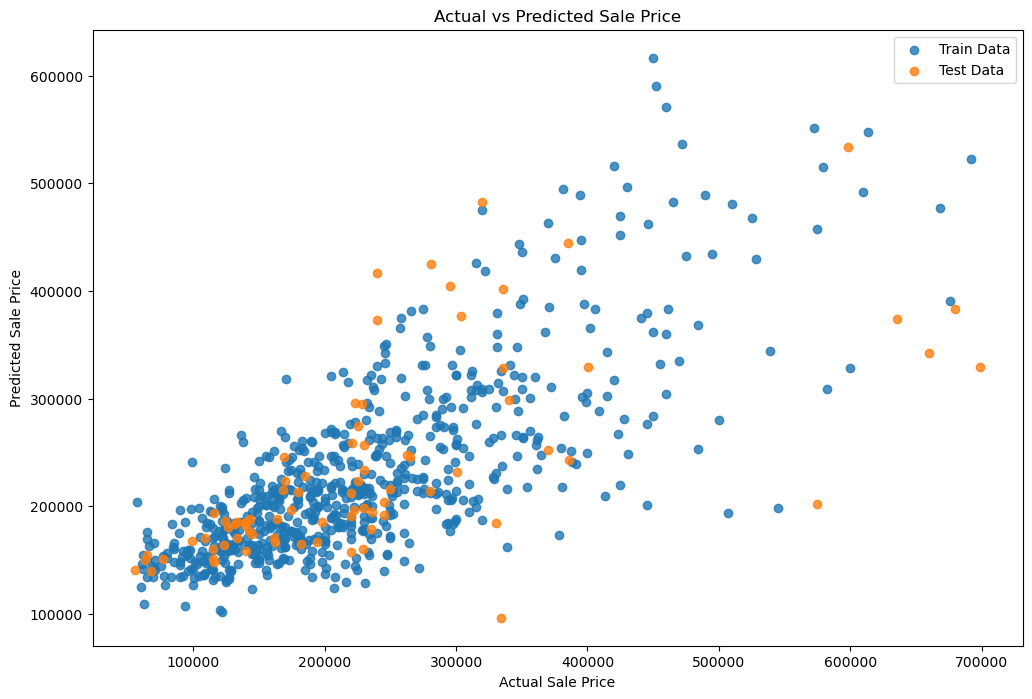

In [26]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_train_predict, label="Train Data", alpha=0.8)
plt.scatter(y_test, y_pred, label="Test Data", alpha=0.8)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.legend()
plt.show()

**3. Test the Efficiency**

In [17]:
test_features = pd.DataFrame({
    'area': [846, 1324, 1150, 3037, 3984],
    'bedrooms': [1, 2, 3, 4, 5]
})

# Use the trained model to predict the prices for the specified test set
predicted_prices = model.predict(test_features)

# Create a DataFrame for the actual and predicted prices
test_results = pd.DataFrame({
    'Actual Price': [115000, 234500, 198000, 528000, 572500],
    'Predicted Price': predicted_prices
})

# Display the test results
print(test_results)

   Actual Price  Predicted Price
0        115000    159979.813209
1        234500    212504.397155
2        198000    168669.804378
3        528000    429430.707345
4        572500    551268.870866


**4. Find the Root-Mean-Square Error (RMSE) for the training and test data. If they are close enough we have increased confidence that our model has reasonable generalization ability**

In [28]:
# Calculate RMSE for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE values
print("RMSE for Training Data:", rmse_train)
print("RMSE for Test Data:", rmse_test)

RMSE for Training Data: 70130.66283826187
RMSE for Test Data: 107793.61781139293


From the results above we can see that the RMSE for the training data is smaller than that of the test data. A smaller RMSE on the training data indicates good performance on the training set, but the larger RMSE on the test data raises concerns about the model's ability to generalize to new data.

**5 & 6**

In [59]:
#Create the functions
df_2 = pd.DataFrame({
    'x1': np.ones(len(df)),
    'x2': df['area'],
    'x3': df['area'].apply(lambda x: max(x - 1500, 0)),
    'x4': df['bedrooms'],
    'x5': df['condo'],
})

dummy=pd.get_dummies(df['location'], drop_first=True)
df_2 = pd.concat([df_2, dummy], axis=1)
df_2 = df_2.rename(columns={2: "x6", 3: "x7", 4: "x8"})

# Put the prices as the last column of the data frame
y = df['price']
df_2 = pd.concat([df_2, y.rename('y')], axis=1)

In [60]:
df_2

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,1.0,941,0,2,1,1,0,0,94905
1,1.0,1146,0,3,0,1,0,0,98937
2,1.0,909,0,3,0,1,0,0,100309
3,1.0,1289,0,3,0,0,1,0,106250
4,1.0,1020,0,3,0,0,1,0,107502
...,...,...,...,...,...,...,...,...,...
769,1.0,2280,780,4,0,0,1,0,232425
770,1.0,1477,0,3,0,0,1,0,234000
771,1.0,1216,0,3,0,1,0,0,235000
772,1.0,1685,185,4,0,0,1,0,235301


In [61]:
# Shuffle the new data
shuffled = df_2.sample(frac=1, random_state=42)

In [62]:
# Specify the number of records for training
num_train_records = 695

# Randomly choose records for training from the shuffled DataFrame
train_data_2 = shuffled.head(num_train_records)
# The remaining records will be used for testing
test_data_2 = shuffled.tail(len(shuffled) - num_train_records)

print("Training data shape:", train_data_2.shape)
print("Testing data shape:", test_data_2.shape)

Training data shape: (695, 9)
Testing data shape: (79, 9)


In [64]:
# Extract features and target variable for training
X_train_2 = train_data_2[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']] 
y_train_2 = train_data_2[['y']]

# Extract features and target variable for testing
X_test_2 = test_data_2[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
y_test_2 = test_data_2[['y']]

In [72]:
# Create a linear regression model
model_2 = LinearRegression(fit_intercept=True)

# Train the model on the training set
model_2.fit(X_train_2, y_train_2)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_2)

# Evaluate the model
mse_2 = mean_squared_error(y_test_2, y_pred_2)
r2_2 = r2_score(y_test_2, y_pred_2)

# Print evaluation metrics
print("Mean Squared Error:", mse_2)
print("R-squared:", r2_2)

Mean Squared Error: 9447368742.637373
R-squared: 0.5272872702953202


In [75]:
# Print coefficients and intercept
print("Intercept 𝛽0:", model_2.intercept_)  # Intercept

# Check the number of features in your model
num_features = len(model_2.coef_)

# Print coefficients for each feature
for i in range(num_features):
    print(f"Coefficient 𝛽{i+1}:", model_2.coef_[i])


Intercept 𝛽0: [92278.55510975]
Coefficient 𝛽1: [ 0.00000000e+00  1.77785644e+02 -4.64279358e+01 -1.82925861e+04
 -1.95494708e+04 -7.83377389e+04 -8.68021212e+04 -6.39058268e+03]


In [76]:
# Make predictions on the training set
y_train_predict_2 = model_2.predict(X_train_2)

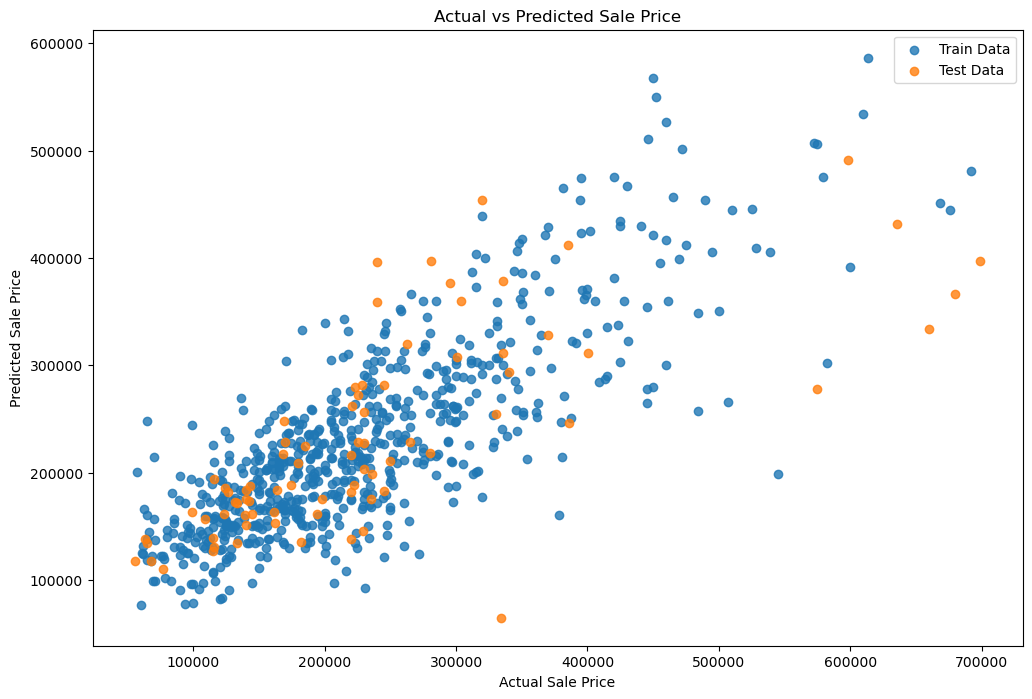

In [77]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(12, 8))
plt.scatter(y_train_2, y_train_predict_2, label="Train Data", alpha=0.8)
plt.scatter(y_test_2, y_pred_2, label="Test Data", alpha=0.8)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.legend()
plt.show()

In [78]:
# Calculate RMSE for training and test sets
rmse_train_2 = np.sqrt(mean_squared_error(y_train_2, y_train_predict_2))
rmse_test_2 = np.sqrt(mean_squared_error(y_test_2, y_pred_2))

# Print RMSE values
print("RMSE for Training Data:", rmse_train_2)
print("RMSE for Test Data:", rmse_test_2)

RMSE for Training Data: 64402.62182436201
RMSE for Test Data: 97197.57580638198


The RMSE scores indicate that the new model has smaller values, suggesting improved performance compared to the previous model.

**7. Cross Validation**

In [81]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

# 5-fold Cross-Validation 
scores_1 = cross_val_score(
    model,  X = df[['area', 'bedrooms']],  y=df['price'], cv=5,
    scoring="neg_root_mean_squared_error")
scores_2 = cross_val_score(
    model,  X = df_2[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']],  y=df_2['y'], cv=5,
    scoring="neg_root_mean_squared_error")

#calculate RMS error for both models
rmse_1 = np.sqrt((np.power(scores_1,2)).mean())
rmse_2 = np.sqrt((np.power(scores_2,2)).mean())

print('RMS cross validation for the first model: ', rmse_1)
print('RMS cross validation for the second model: ', rmse_2)


RMS cross validation for the first model:  75584.00626993772
RMS cross validation for the second model:  69486.19991084159


Both models seem to have improved after cross-validation, and the second model is still performing better than the first one. (We performed a 5-fold cross-validation since the dataset is relatively small to support a 10-fold cross-validation)